In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape
#60,000 images in 28 rows and 28 columns of each image 

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
#preprocessing and 1 represents channel - we are flattening it 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
#float32 required for this algorithm 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
#divided by 255 
x_train /= 255
x_test /= 255

In [7]:
#sequential model and dense layer is used
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
#convultion starts - 28 filters in the shape of 3,3
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#After flattening, comes neural network creation - 128 neurons - recall 1b 3b YT video visualization
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
#10 classes being used 
model.add(Dense(10,activation=tf.nn.softmax))

C:\Anaconda\envs\aiml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#https://keras.io/api/optimizers/
#compile is where model is executed 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#during fit, learning happens, epoch is 1 full forward & full backward, for every epoch, accuracy should increase and loss should decrease
model.fit(x=x_train,y=y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8927 - loss: 0.3575
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9744 - loss: 0.0857
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9816 - loss: 0.0568
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9862 - loss: 0.0409
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9886 - loss: 0.0333
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9913 - loss: 0.0263
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9914 - loss: 0.0244
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9929 - loss: 0.0206
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9937 - loss: 0.0181
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9942 - loss: 0.0178


In [9]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9815 - loss: 0.0715


[0.06305260956287384, 0.9843000173568726]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
6


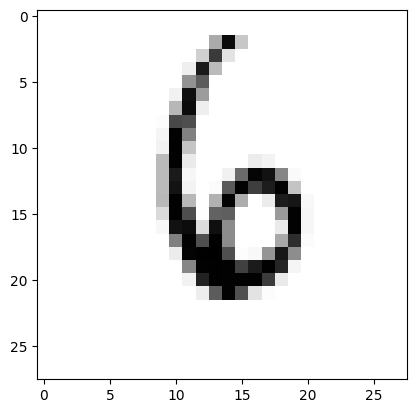

In [10]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


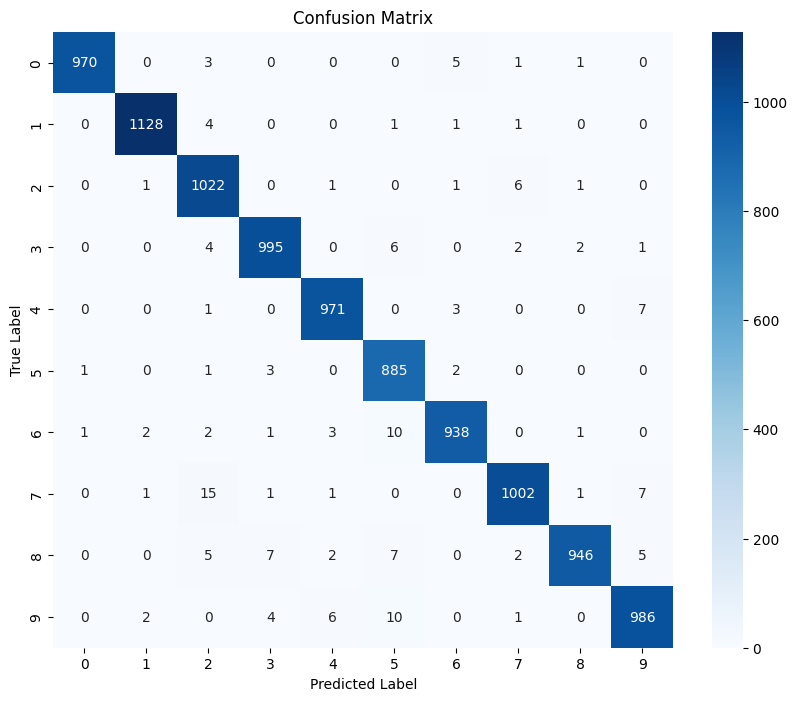

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [15]:
#Confusion matrix for Digit MNIST


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = y_test  # No need to use np.argmax

# Generate the Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate the Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))